In [2]:
import os 
import pandas as pd

DATA_PATH=r"C:\Users\Administrador\Desktop\DATos\Ciclo 1\Entregables"

file_processed=r'oilst_processed.csv'

columns_dates=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
    ]

processed = pd.read_csv(
    os.path.join(DATA_PATH, file_processed),
    parse_dates=columns_dates
    )

In [3]:
delivered_filter = "order_status  == 'delivered' "

delivered = processed.query(delivered_filter)

In [4]:
'''Script que calcule la proporción que han representado las ventas de órdenes completas de Oilst 
dentro de los categorías de `delay_status` y a los largo de los trimestres de 2016 a 2018. 
El resultado de este script deberá ser un tabla denominada `prop_sales_delay_status_by_quarte.csv`.'''

prop_sales_delay_status_by_quarte=delivered.pivot_table(
    index='delay_status',
    columns = 'quarter',
    values= 'total_sales',
    aggfunc= 'sum',
    fill_value=0
    ).apply(lambda x:   x / float(x.sum()), axis=0).round(2)


In [5]:
prop_sales_delay_status_by_quarte.to_csv(
    # nombre del archivo
    'prop_sales_delay_status_by_quarte.csv',
    # flag para no escribir el indice del dataframe al csv
    index=False)

In [6]:
'''Programa que construya una tabla con la cantidad conteos cuantas órdenes que existieron por cantidad
 de productos dentro de la orden y el tipo de retraso de las categorías `delay_status`.
 El resultado de este script deberá ser un tabla denominada `count_orders_basket_size_by_delay_status.csv`.'''

count_orders_basket_size_by_delay_status=pd.crosstab(
     delivered['total_products'],
     delivered['delay_status'],
     margins = True
 ).sort_values(['long_delay']).tail(10)

count_orders_basket_size_by_delay_status.to_csv(
    # nombre del archivo
    'count_orders_basket_size_by_delay_status.csv',
    # flag para no escribir el indice del dataframe al csv
    index=False)

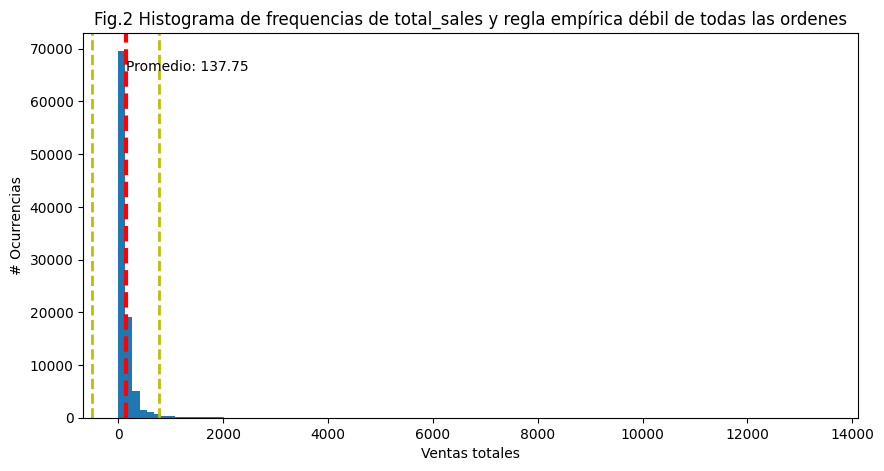

In [7]:
'''Programa que construya el histograma de frecuencias de la variable `total_sales`, 
junto con la el promedio intervalos que define la regla empírica débil para encontrar el 88.88% 
de los datos alrededor del promedio, restringiendo el análisis las órdenes que tienen status completo. 
El resultado de este script deberá ser una figura denominada `histogram_sales_long_delay.png`.'''

import matplotlib.pyplot as plt

# figura y eje de la figura
fig, ax = plt.subplots(figsize=(10, 5))

# numero de intervalos para conteos
n_bins = 100

# creacion del objeto historgama
n, bins, patches = ax.hist(
    processed['total_sales'],
    n_bins
    )

ax.set_title('Fig.2 Histograma de frequencias de total_sales y regla empírica débil de todas las ordenes' )
ax.set_xlabel('Ventas totales')
ax.set_ylabel('# Ocurrencias')

## Agrega la media y las regiones de la regla empírica débil
## Linea para la media
plt.axvline(
    processed['total_sales'].mean(),
    color='r',
    linestyle='dashed',
    linewidth=3)

## Linea para la media + 3 veces la desv. estandar
plt.axvline(
    processed['total_sales'].mean() + 3*processed['total_sales'].std(),
    color='y',
    linestyle='dashed',
    linewidth=2)

## Linea para la media - 3 veces la desv. estandar
plt.axvline(
    processed['total_sales'].mean() - 3*processed['total_sales'].std(),
    color='y',
    linestyle='dashed',
    linewidth=2)

## limites de la figura
min_ylim, max_ylim = plt.ylim()

## Etiquetas
plt.text(
    processed['total_sales'].mean()*1.1,
    max_ylim*0.9,
    'Promedio: {:.2f}'.format(processed['total_sales'].mean())
    )

plt.show()

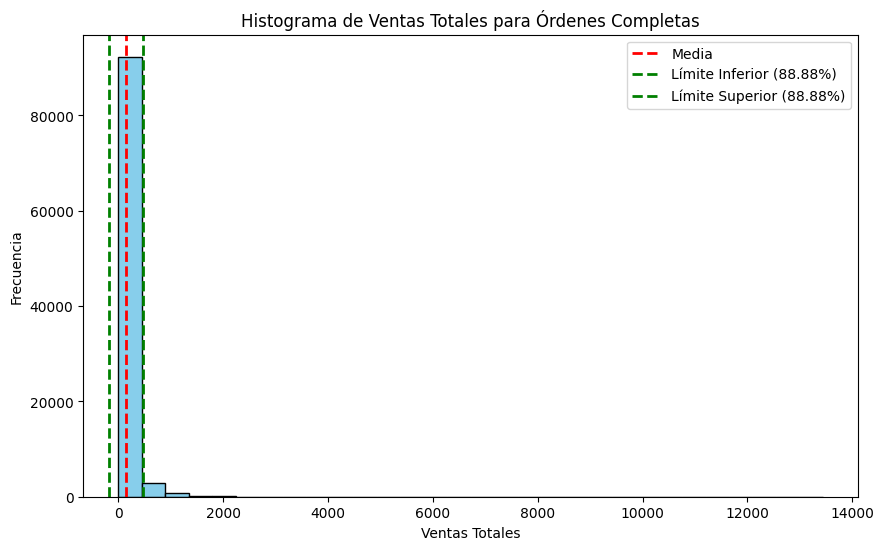

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que 'total_sales' y 'status' son tus datos reales
total_sales = delivered.total_sales
status = delivered.order_status
# Filtrar órdenes con estado 'completo'

complete_orders_sales = delivered.total_sales

# Calcular media y desviación estándar de los datos filtrados
mean_sales = np.mean(complete_orders_sales)
std_sales = np.std(complete_orders_sales)

# Calcular los límites para el 88.88% de los datos según la regla empírica débil
lower_bound = mean_sales - 1.55 * std_sales
upper_bound = mean_sales + 1.55 * std_sales

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(complete_orders_sales, bins=30, color='skyblue', edgecolor='black')

# Añadir líneas para la media y los límites del intervalo
plt.axvline(mean_sales, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(lower_bound, color='green', linestyle='dashed', linewidth=2, label='Límite Inferior (88.88%)')
plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=2, label='Límite Superior (88.88%)')

# Añadir etiquetas y título
plt.xlabel('Ventas Totales')
plt.ylabel('Frecuencia')
plt.title('Histograma de Ventas Totales para Órdenes Completas')
plt.legend()

# Mostrar el gráfico
plt.show()


In [9]:
# Matriz de correlación entre ordenes que llegaron pero con un retrazo prolongado
filter = ("delay_status == 'long_delay'") # filtro para definir ordenes con retraso prolongado

# lista de variables numericas de ventas, productos, retrasos y distancia al centro de distribucion
numerical_variables = ['total_sales', 'total_products', 'distance_distribution_center','delta_days' ]

# calculo de matriz de correlacion
delivered.query(filter)[
    numerical_variables
    ].corr().round(4)

,total_sales,total_products,distance_distribution_center,delta_days
total_sales,1.0000,0.0756,0.0179,0.0187
total_products,0.0756,1.0000,-0.0035,-0.0179
distance_distribution_center,0.0179,-0.0035,1.0000,0.7609
delta_days,0.0187,-0.0179,0.7609,1.0000
